Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Load Data

In [2]:
df=pd.read_csv(r"c:\Users\ezath\Downloads\archive (7)\covtype.csv")

Show Data

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [8]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [9]:
df.shape

(581012, 55)

Data Cleaning

Check for Null Values

In [10]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Check For Duplicated Values

In [11]:
df.duplicated().sum()

np.int64(0)

Check For Outliers

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if df[(df[col] < lower) | (df[col] > upper)].shape[0] > 0:
        outlier_cols.append(col)

print(f"cols_Outliers: {outlier_cols}")

cols_Outliers: ['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area2', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


EDA Visualization

In [13]:
numeric_cols = [
    'Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]


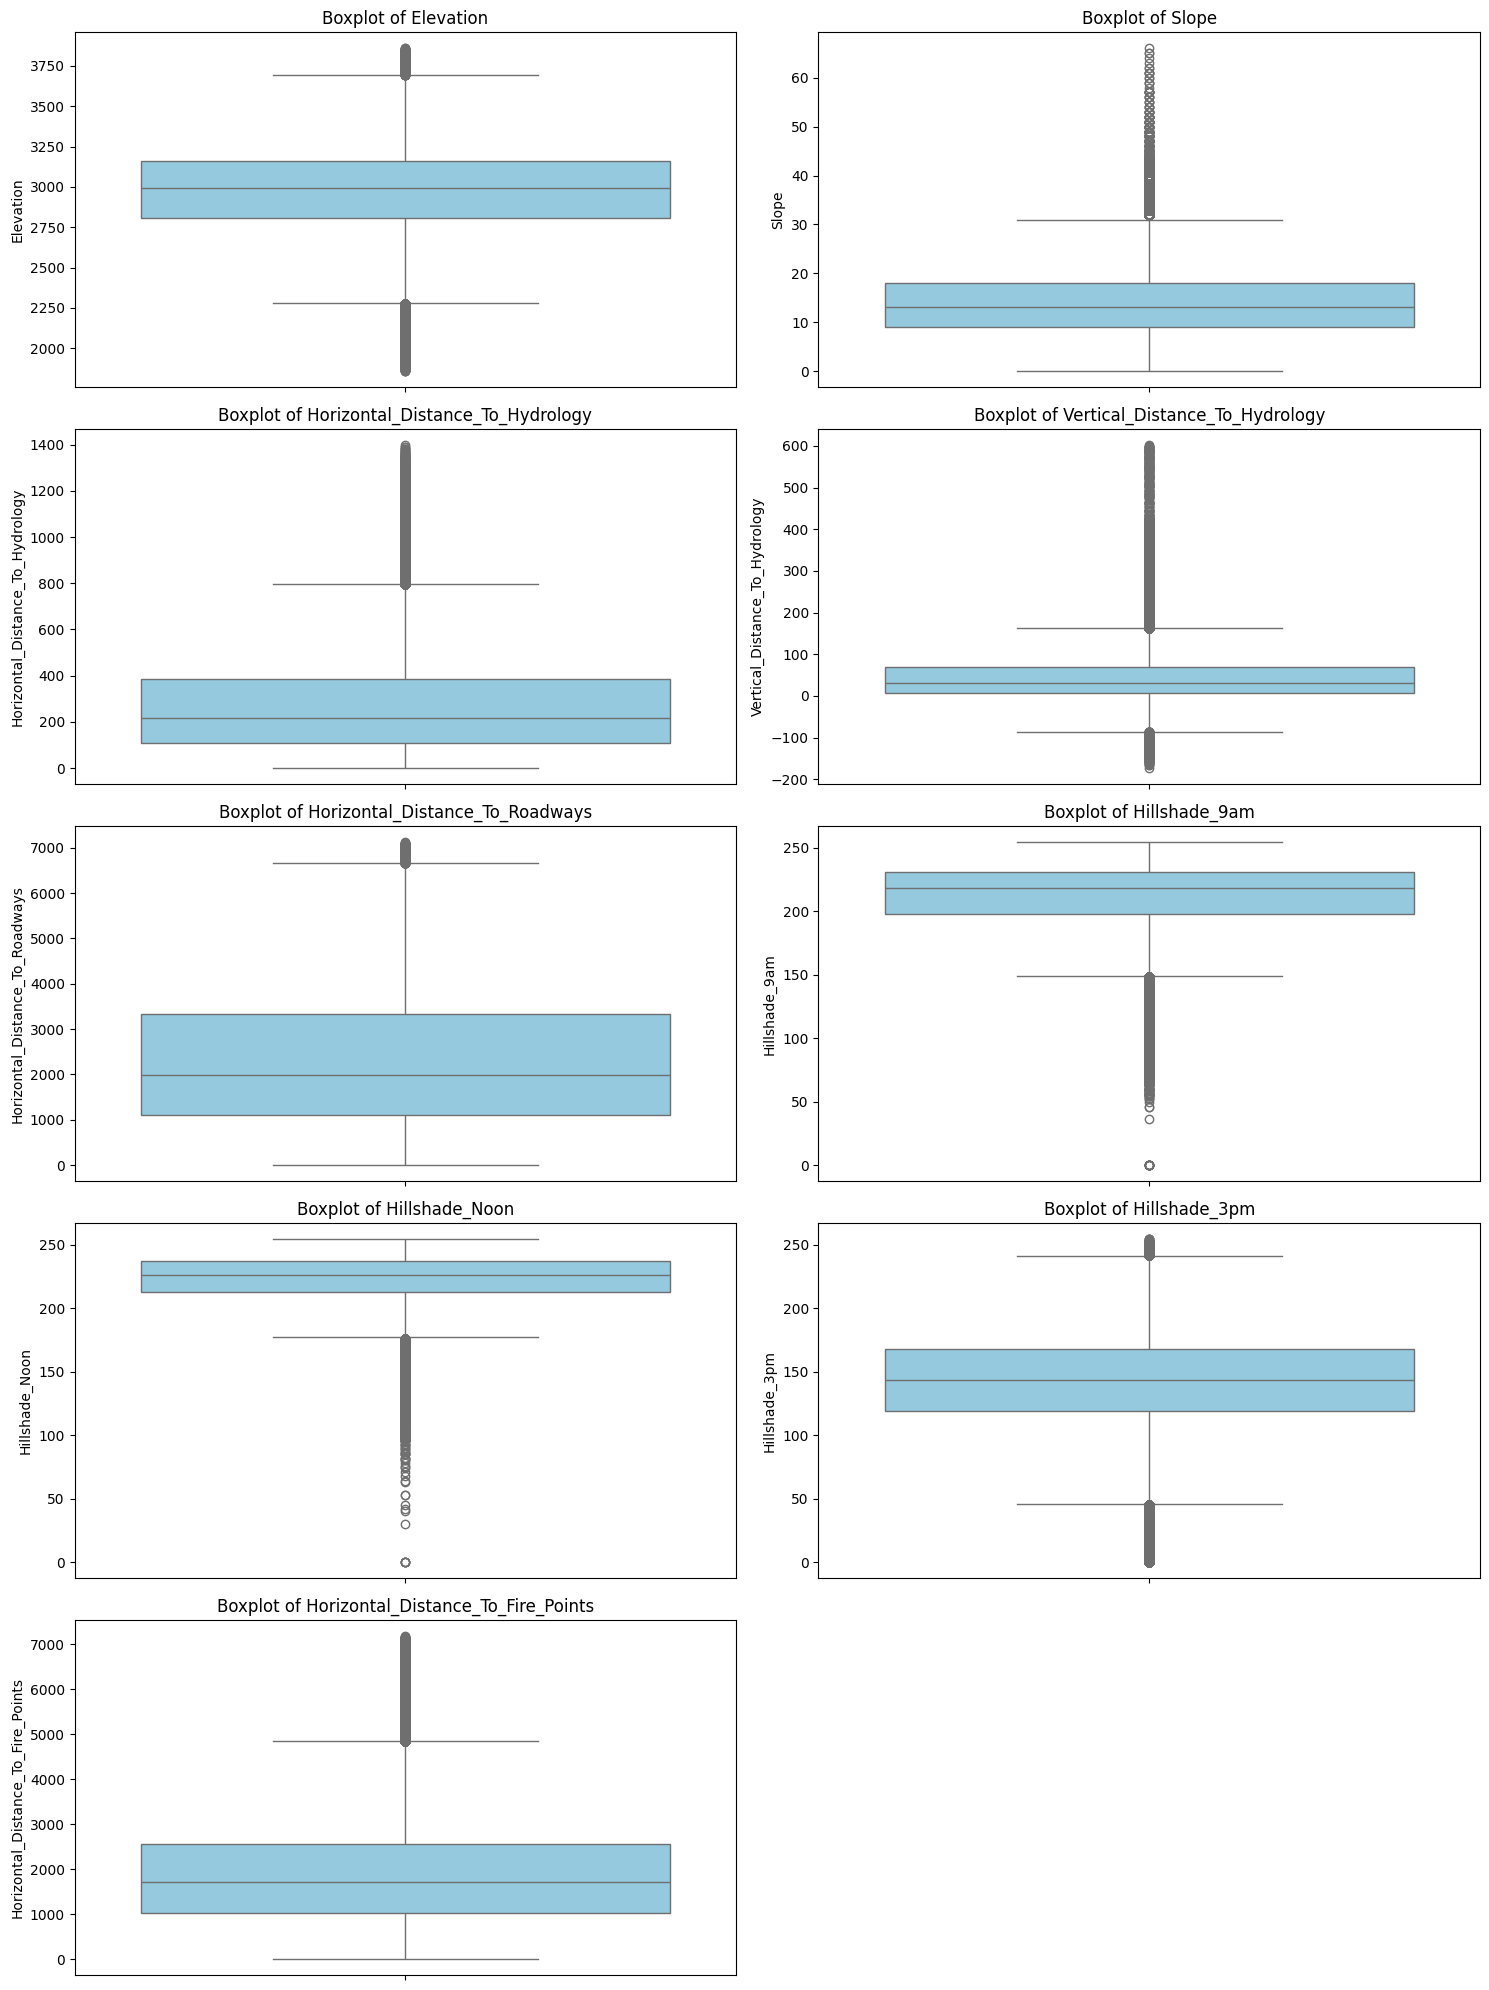

In [14]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

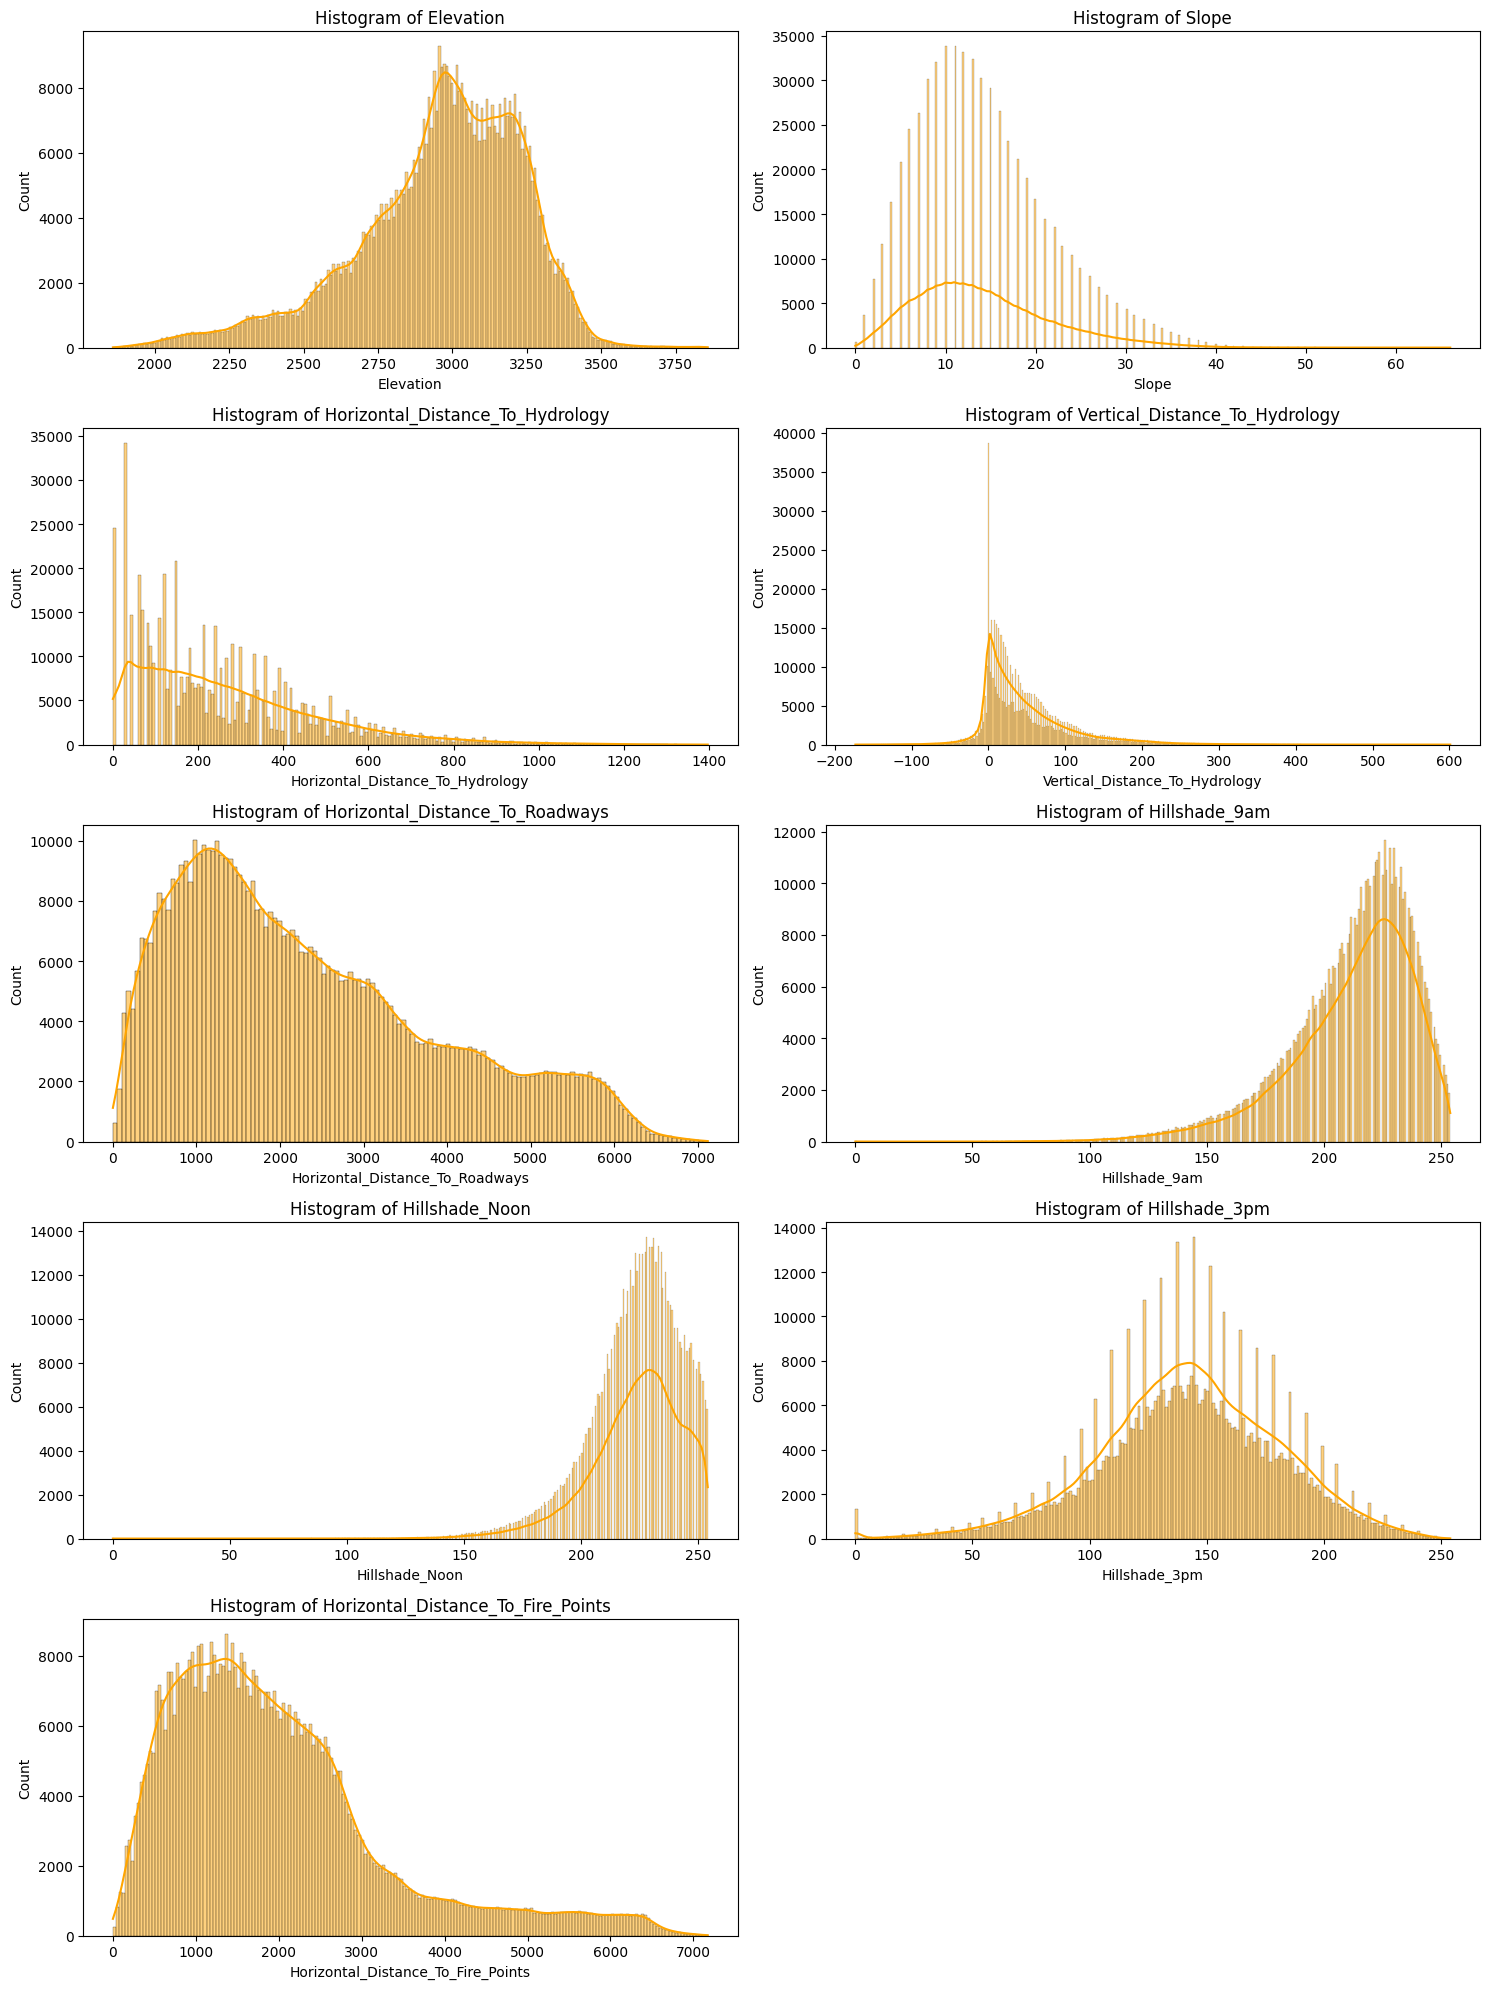

In [15]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, color="orange")
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

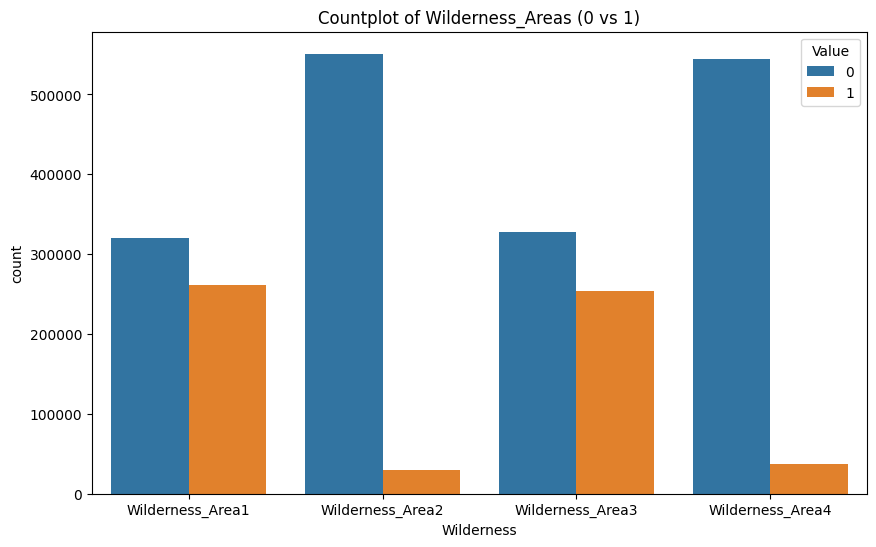

In [16]:
wilderness_cols = [col for col in df.columns if "Wilderness_Area" in col]
plt.figure(figsize=(10, 6))
sns.countplot(data=df[wilderness_cols].melt(var_name="Wilderness", value_name="Value"),
              x="Wilderness", hue="Value")
plt.title("Countplot of Wilderness_Areas (0 vs 1)")
plt.show()


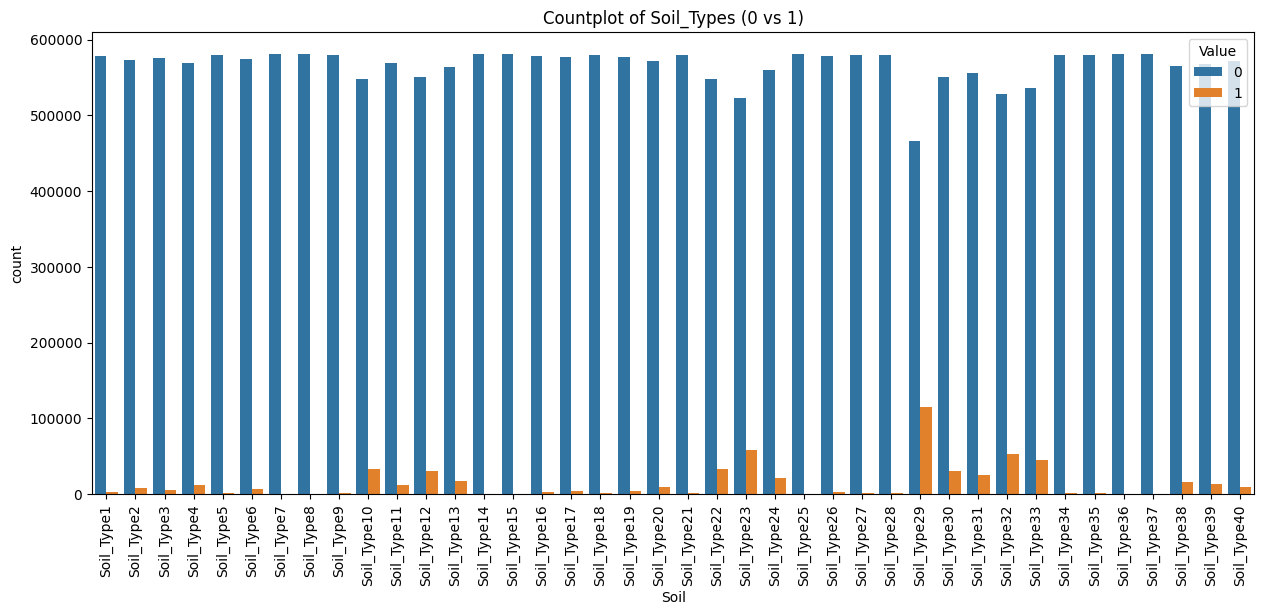

In [17]:
soil_cols = [col for col in df.columns if "Soil_Type" in col]
plt.figure(figsize=(15, 6))
sns.countplot(data=df[soil_cols].melt(var_name="Soil", value_name="Value"),
              x="Soil", hue="Value")
plt.title("Countplot of Soil_Types (0 vs 1)")
plt.xticks(rotation=90)
plt.show()


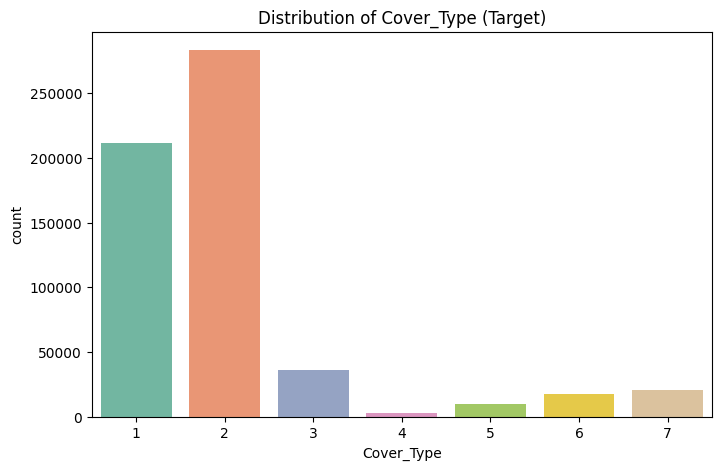

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Cover_Type"], palette="Set2")
plt.title("Distribution of Cover_Type (Target)")
plt.show()

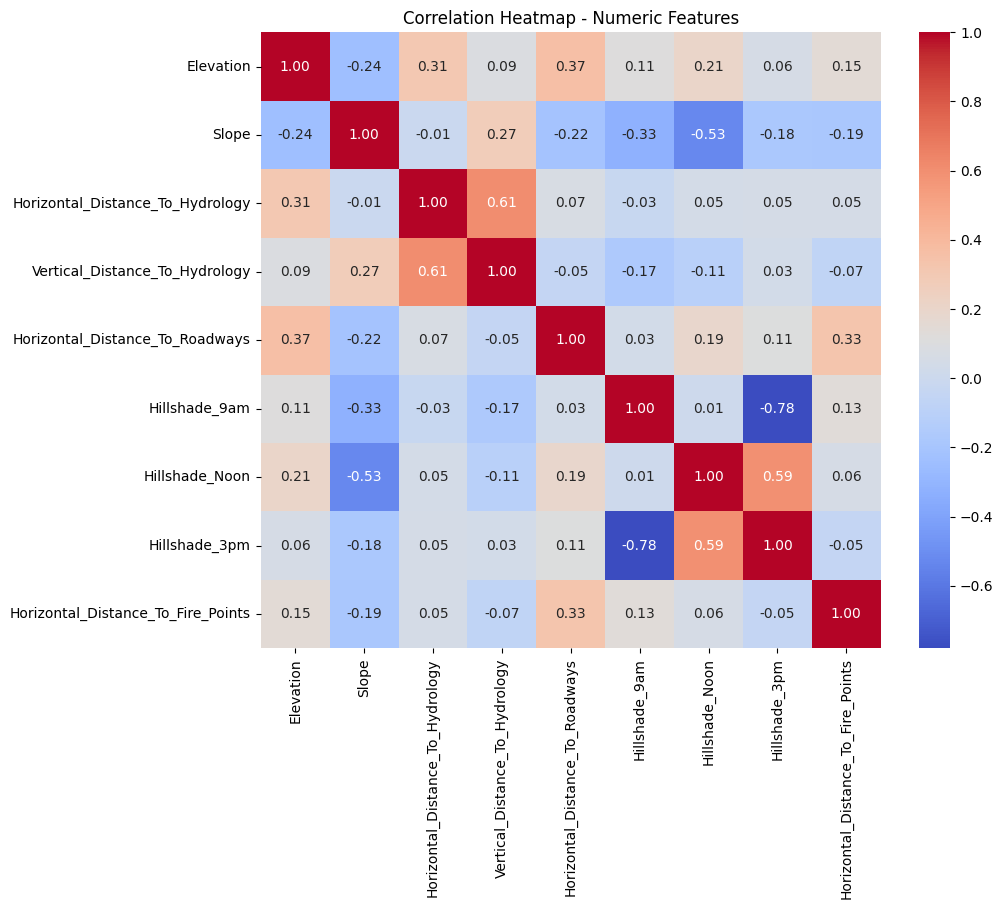

In [19]:
corr_numeric = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_numeric, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

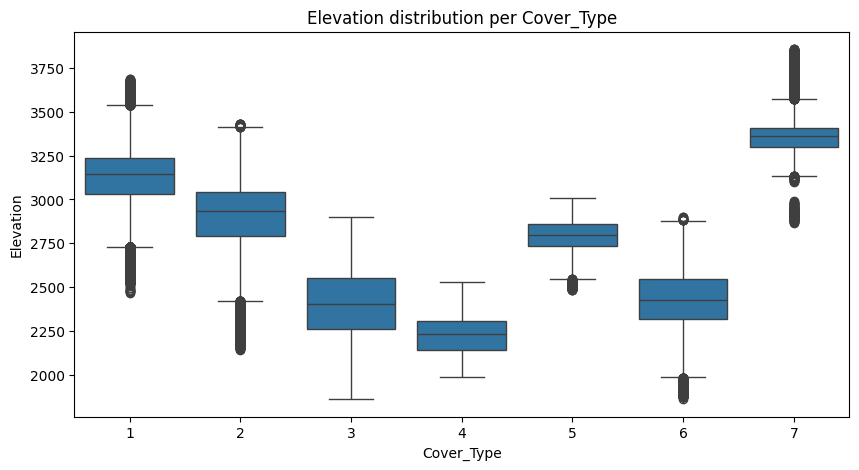

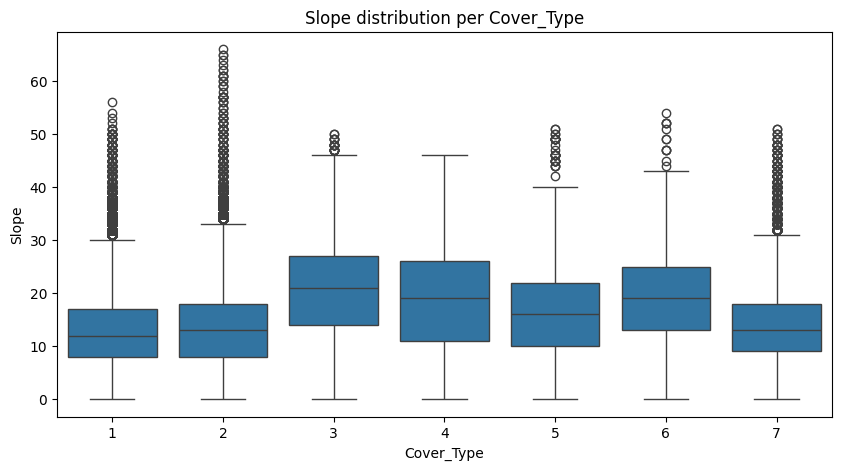

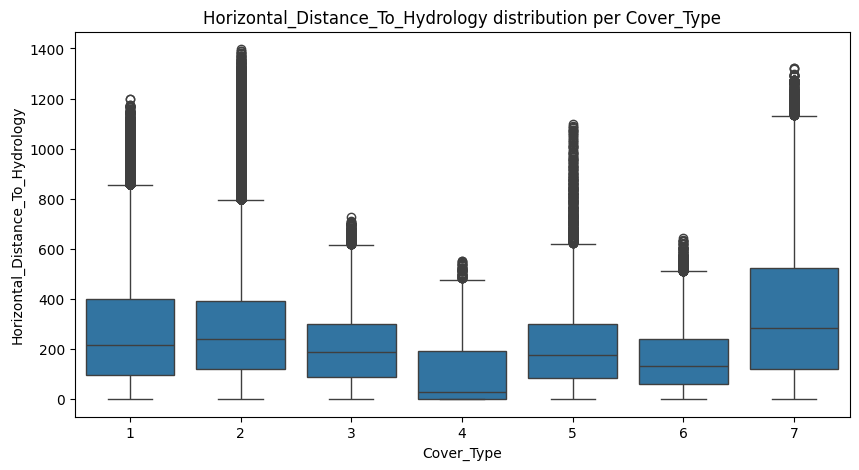

In [20]:
numeric_cols = ['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology']

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Cover_Type', y=col, data=df)
    plt.title(f"{col} distribution per Cover_Type")
    plt.show()

Split Data

In [21]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"] - 1

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Select Important Features

In [23]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss')
}


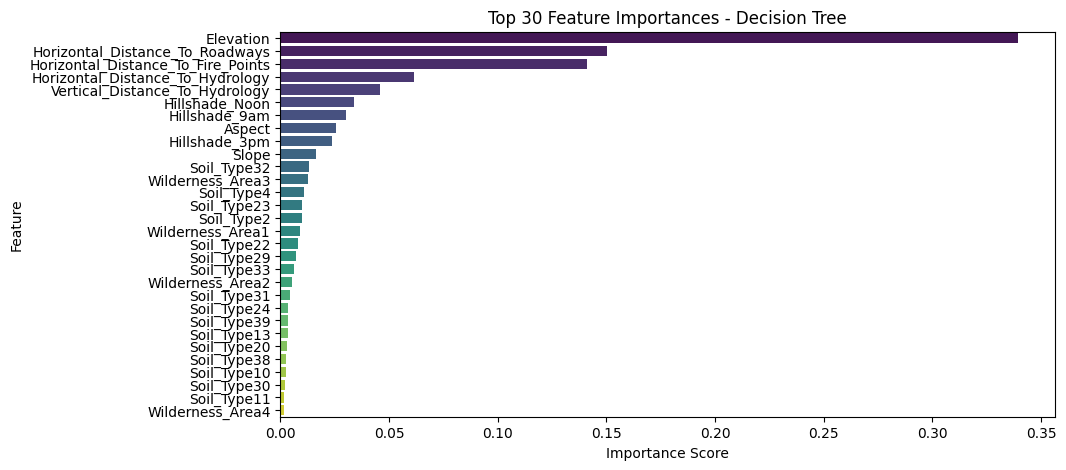

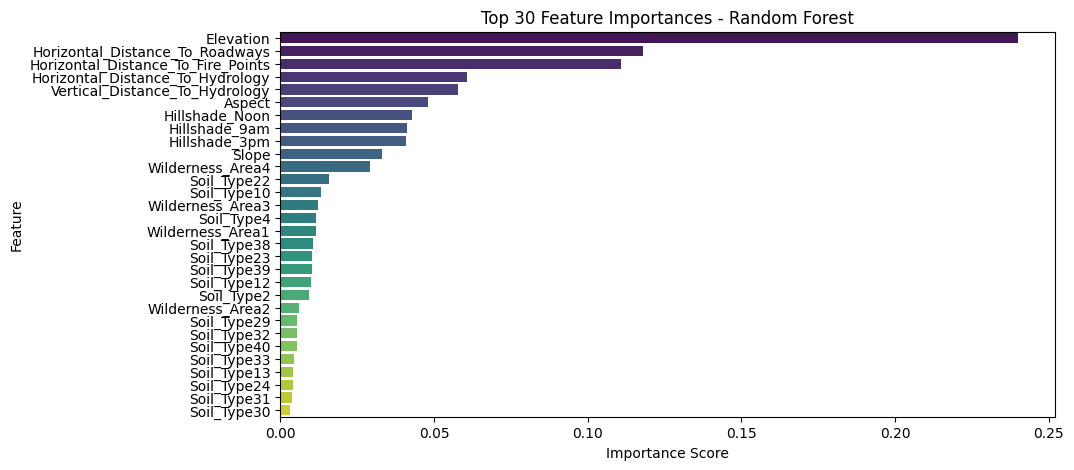

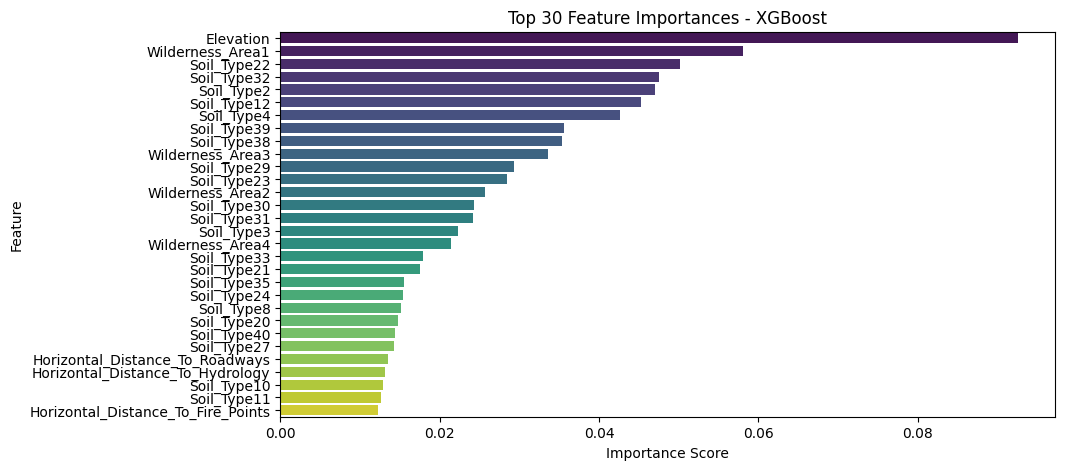

In [24]:
top_features_dict = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    feat_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:30]
    top_features_dict[name] = feat_imp.index.tolist()
    
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
    plt.title(f"Top 30 Feature Importances - {name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

Evalution

In [25]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"\n***** {model_name} *****")
    print("Classification Report (Test):")
    print(classification_report(y_test, y_pred_test))
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train, average="weighted")
    test_f1 = f1_score(y_test, y_pred_test, average="weighted")

    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f} | Test F1 Score: {test_f1:.4f}")
    
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return model



Train & Evaluate Using Top Features Only


***** Decision Tree *****
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     42368
           1       0.94      0.95      0.94     56661
           2       0.92      0.92      0.92      7151
           3       0.80      0.81      0.80       549
           4       0.82      0.77      0.79      1899
           5       0.87      0.86      0.87      3473
           6       0.94      0.93      0.94      4102

    accuracy                           0.93    116203
   macro avg       0.89      0.88      0.88    116203
weighted avg       0.93      0.93      0.93    116203

Train Accuracy: 0.9855 | Test Accuracy: 0.9309
Train F1 Score: 0.9855 | Test F1 Score: 0.9308


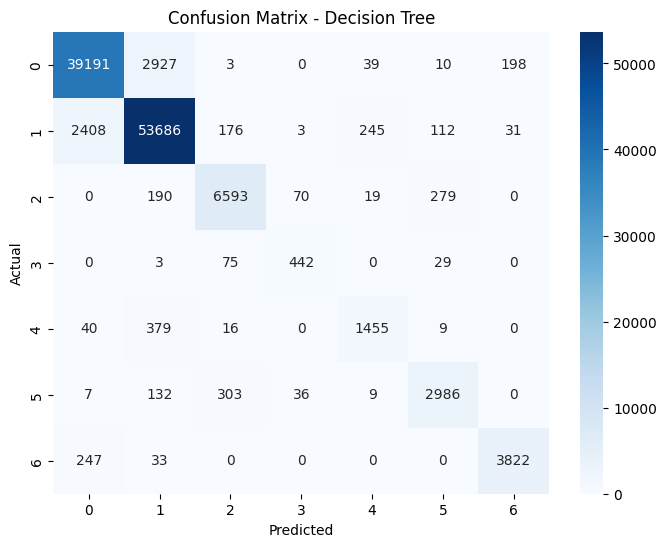


***** Random Forest *****
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     42368
           1       0.93      0.97      0.95     56661
           2       0.94      0.95      0.94      7151
           3       0.89      0.84      0.86       549
           4       0.96      0.66      0.79      1899
           5       0.93      0.88      0.91      3473
           6       0.98      0.94      0.96      4102

    accuracy                           0.94    116203
   macro avg       0.94      0.88      0.91    116203
weighted avg       0.94      0.94      0.94    116203

Train Accuracy: 0.9873 | Test Accuracy: 0.9425
Train F1 Score: 0.9872 | Test F1 Score: 0.9420


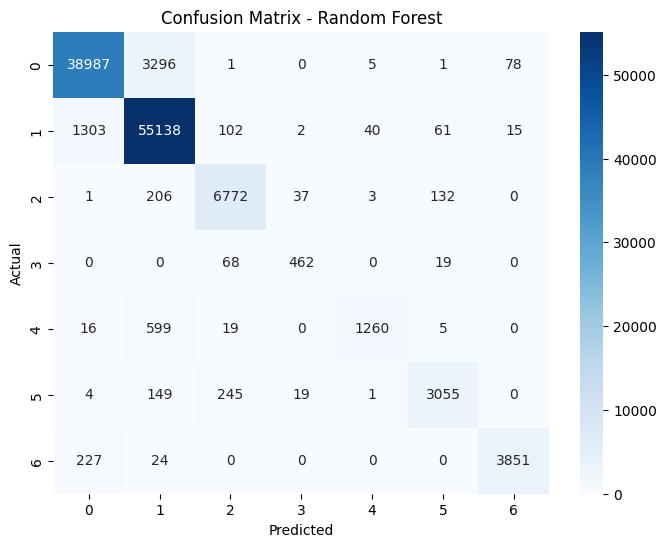


***** XGBoost *****
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.93      0.94      0.93      7151
           3       0.87      0.83      0.85       549
           4       0.92      0.83      0.87      1899
           5       0.90      0.87      0.88      3473
           6       0.96      0.96      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.93      0.90      0.92    116203
weighted avg       0.95      0.95      0.95    116203

Train Accuracy: 0.9820 | Test Accuracy: 0.9501
Train F1 Score: 0.9819 | Test F1 Score: 0.9499


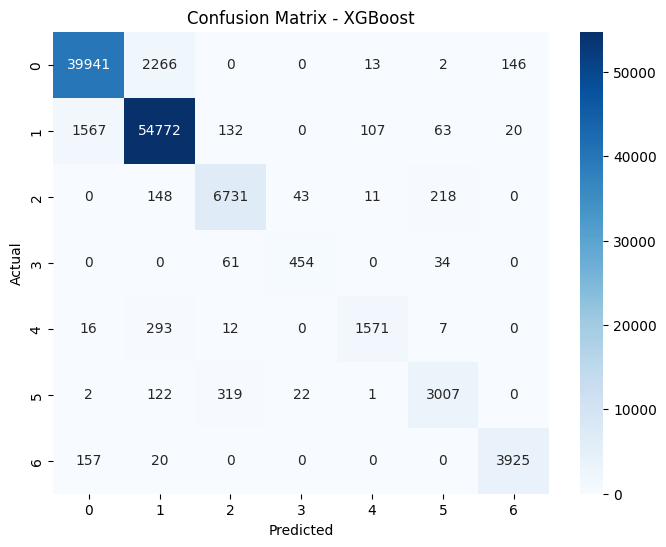

In [26]:
for model, name in [
    (DecisionTreeClassifier(random_state=42, max_depth=25), "Decision Tree"),
    (RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=300, max_depth=25), "Random Forest"),
    (XGBClassifier(random_state=42, eval_metric='mlogloss',n_estimators=500, learning_rate=0.05, max_depth=12,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0), "XGBoost")
]:
    X_new = df[top_features_dict[name]]
    y_new = df["Cover_Type"] - 1
    
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
        X_new, y_new, test_size=0.2, random_state=42, stratify=y_new
    )
    
    trained_model = train_evaluate_model(model, X_train_new, y_train_new, X_test_new, y_test_new, model_name=name)